In [1]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
 
import matplotlib.pyplot as plt
%matplotlib inline
!pip install imbalanced-learn

import pandas as pd
import numpy as np
df = pd.read_csv(r'pic50RDkit2D.csv')
df.shape
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

X = df.drop("pIC50", axis=1)
Y = df["pIC50"]
df.head(10)
df=df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df=df.replace(np.nan, 0)
X = df.drop("pIC50", axis=1)
y = df["pIC50"]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#Spliting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)



Coefficient of determination(R^2) = 0.6481999242018462
Mean squared error = 0.46728249092441093
Root Mean squared error = 0.6835806396647077


Text(0.5, 1.0, 'Extremely Randomized Trees')

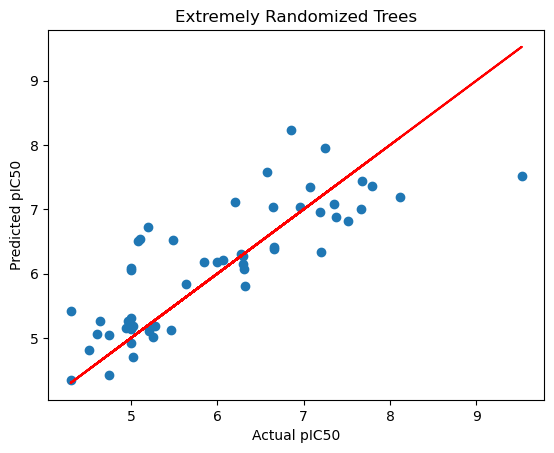

In [3]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
XRFreg = ExtraTreesRegressor(n_estimators=10,random_state=0)
XRFreg.fit(X_train,y_train)
XRF_cod=XRFreg.score(X_test,y_test)
mse=(metrics.mean_squared_error(XRFreg.predict(X_test),y_test))
print('Coefficient of determination(R^2) = {}'.format(XRF_cod)) 
print('Mean squared error = {}'.format(mse))
XRF_rmse=mse**0.5
print('Root Mean squared error = {}'.format(XRF_rmse))


plt.scatter(y_test,XRFreg.predict(X_test))
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Extremely Randomized Trees')

In [13]:
import shap
# Fits the explainer
explainer = shap.Explainer(XRFreg.predict, X_test, max_evals = 3000)
# Evaluate SHAP values
shap_values = explainer(X_test)

Permutation explainer: 54it [00:18,  1.58it/s]                                                                         


In [8]:
!pip install pluggy

In [14]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)

AttributeError: module 'warnings' has no attribute 'DeprecationWarning'

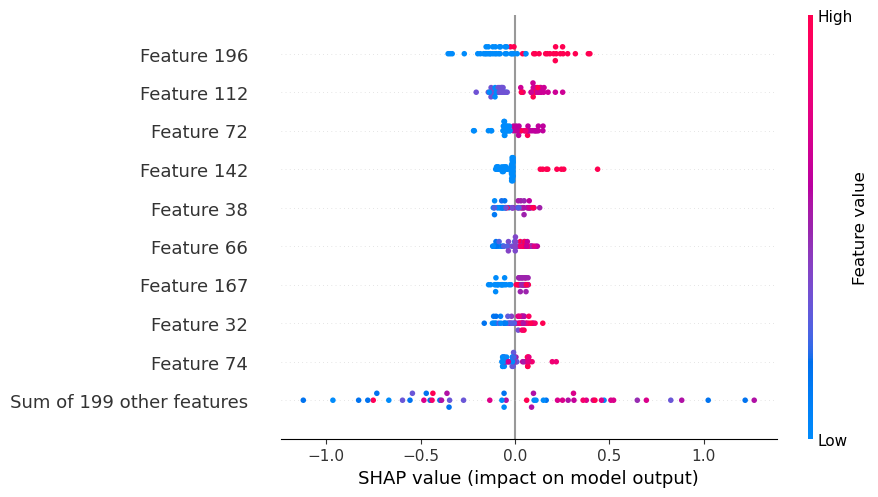

In [15]:
shap.plots.beeswarm(shap_values)

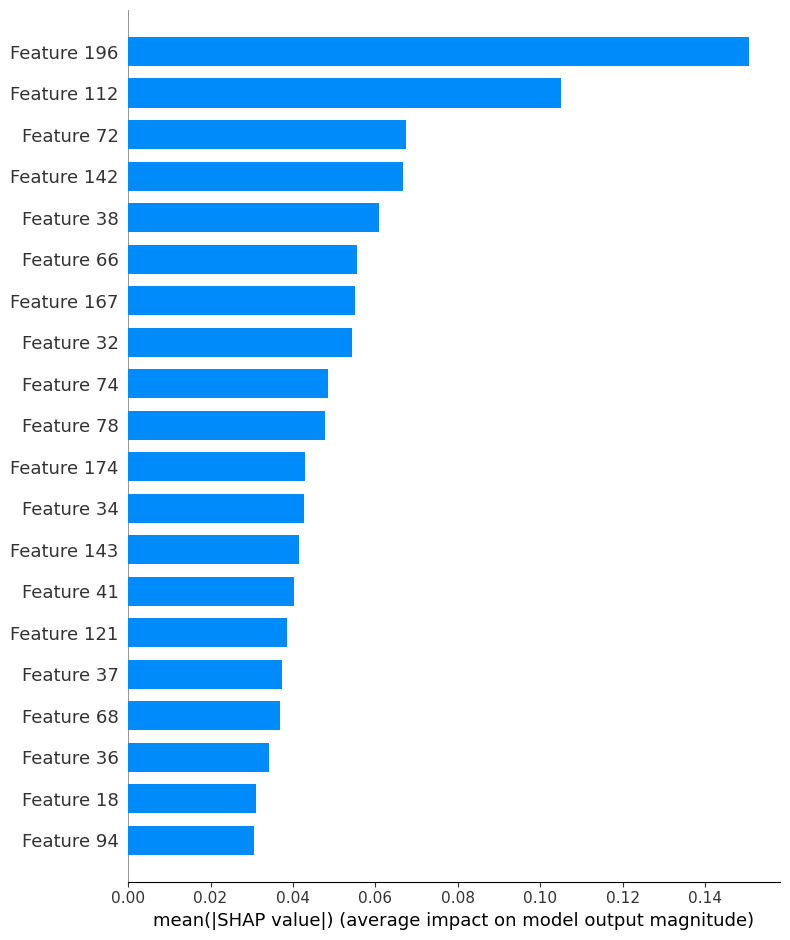

In [16]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
